# Linear Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,root_mean_squared_error

In [27]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
scaler=StandardScaler()
df[['total_bill','tip']]=scaler.fit_transform(df[['total_bill','tip']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


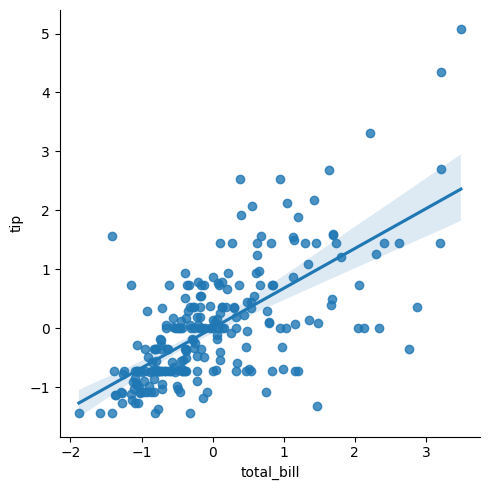

In [29]:
sns.lmplot(x='total_bill',y='tip',data=df)

In [30]:
x=df[['total_bill']]
y=df['tip']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
model.predict([[15]])

array([10.35454829])

In [33]:
y_pred=model.predict(x_test)

In [34]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('r2_score: ',r2_score(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred))
print('RMSE: ',root_mean_squared_error(y_test,y_pred))

MSE:  0.2983382530785567
MAE:  0.4496364577054319
r2_score:  0.5449381659234667
MAPE:  7.369211703304975
RMSE:  0.5462034905404365


We use pickle library to save our model

In [35]:
import pickle
import os
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')
pickle.dump(model,open('./saved_model/01_linear_regression.pkl','wb'))


In [36]:
import pickle
model_load=pickle.load(open('./saved_model/01_linear_regression.pkl','rb'))
model_load.predict([[14]])

array([9.66633732])

Do these task using pipline

Data Pipline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data preprocessing 
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.linear_model import LinearRegression


In [38]:
# warning Hangling
import warnings
warnings.filterwarnings('ignore')

# load data from seaborn
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
# creating x features and y labels
x=df[['total_bill','size','day']]
y=df['tip']

numeric_feature=['total_bill','size']
categoric_feature=['day']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

processor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_feature),
        ('cat',OneHotEncoder(),categoric_feature)
    ])

pipeline=Pipeline(
    steps=[
        ('processor',processor),
        ('model',LinearRegression())
    ])

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)

print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',root_mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))



MAE:  0.6591957722968487
RMSE:  0.8158262931405831
r2_score 0.46752976130485213
MSE 0.6655725405795047
MAPE 0.2730622135259165
